<div style="background-color: #FFC300; color: #000814; border: 1px solid #001D3D; border-radius:10px; padding:20px">
<h1>Telco Customer Churn Predictive Analysis</h1>

For business inquiries or collaboration requests, you can reach me at <strong>peigemalys@gmail.com</strong> or get in touch via <a href='https://www.linkedin.com/in/peige-malys/' style='color:#003566'><strong>LinkedIn.</strong></a>

**Project Description:**
- Unlock insights into customer churn with the <a href='https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data' style='color: #003566;'><strong>Telco Customer Churn Data.</strong></a> Analyze key factors, inform strategic decisions, enhance customer retention and boost revenue.

**Business Questions:**
- What is the overall churn rate in the Telco customer base?
- How does the contract type (month-to-month, one year, two years) correlate with churn?
- What is the impact of different payment methods on customer churn?
- Are customers with higher monthly charges more likely to churn?
- Is there a relationship between tenure and churn rate?
- Is there a specific gender that is more likely to churn?
- How does the presence of additional services (StreamingTV, StreamingMovies, TechSupport, etc...) affect churn?
- Are customers with multiple lines more likely to churn?


**Tools & Softwares Utilized:**
- Jupyter Notebooks with Python and SQL
- Microsoft SQL Server Management Studio (SSMS) to store the database for querying
- Excel & Tableau for dashboard creation

**Analysis Structure:**
- Library Installation
- Data Extraction and Discovery
- Data Cleaning and Transformation
- Data Loading 
- Exploratory Data Analysis
- Feature Engineering 
- Correlation and Bivariate Analysis
- Churn Prediction Model Building
- SQL Integration and Queries
- Excel and Tableau Dashboards
- Analysis Conclusion

<div style='background-color: #001D3D; color:#ffffff; border-radius:10px; padding:20px;'>
<h2>Library Installation, Importation and Aliasing</h2>

In [186]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scipy
!pip install pyodbc
!pip install pmdarima
!pip install pypyodbc
!pip install sqlalchemy

In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc as py
import scipy as sc

<div style='background-color:#001D3D; color:#ffffff; padding:20px; border-radius:10px'>

<h2>Data Extraction and Discovery</h2>

<div style='background-color:#FFD60A; padding:20px; color:#000000;'>
First we will extract the data and perform an initial discovery to better understand what we are working with. Our data was taken from the <a href='https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data' style='color: #003566;'><strong>Telco Customer Churn Dataset</strong></a> set on Kaggle.

In [188]:
telco = pd.read_csv('C:\\Users\\peige\\OneDrive\\Desktop\\Data Analytics Projects\\Telco Churn Rate Analysis\\Telco_Churn_Data.csv')

pd.set_option('display.max_columns', None)

telco.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [189]:
# Identifying the number of rows and columns

telco.shape

(7043, 21)

In [190]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [191]:
telco.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [192]:
# Checking for na value

telco.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [193]:
telco.drop_duplicates(inplace=True)

telco.shape

(7043, 21)

In [194]:
# Checking data types to see if conversions are necessary

telco.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

<div style='background-color:#001D3D; color:#ffffff; padding:20px; border-radius:10px'>
<h2>Data Cleaning and Transformation</h2>

In [195]:
# Rounding MonthlyCharges and TotalCharges to the nearest whole number for float to int conversion

telco['TotalCharges'] = pd.to_numeric(telco['TotalCharges'], errors='coerce')
telco.dropna(subset=['TotalCharges'], inplace=True)

telco['monthly_charges']= telco['MonthlyCharges'].round()
telco['total_charges'] = telco['TotalCharges'].round()

telco['monthly_charges'] = telco['monthly_charges'].astype(int)
telco['total_charges'] = telco['total_charges'].astype(int)

print(f'New data type for monthly_charges: {telco["monthly_charges"].dtypes}')
print(f'New data type for total_charges: {telco['total_charges'].dtypes}')

New data type for monthly_charges: int32
New data type for total_charges: int32


In [196]:
# Revealing unique value in SeniorCitizen column for transformation

telco['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [197]:
# Converting the SeniorCitizens column from numberic values to yes or no

senior_mapping = {0:'No', 1:'Yes'}

telco['senior_citizen'] = telco['SeniorCitizen'].map(senior_mapping)

#telco.drop('SeniorCitizen', axis=1, inplace=True)

print(f"Count of {telco['senior_citizen'].value_counts()}")

Count of senior_citizen
No     5890
Yes    1142
Name: count, dtype: int64


In [198]:
# Dropping the MonthlyCharges and TotalCharges Column

telco.drop('MonthlyCharges', axis=1, inplace=True)
telco.drop('TotalCharges', axis=1, inplace=True)
telco.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,monthly_charges,total_charges,senior_citizen
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,30,30,No


In [199]:
# Creating a column called churn_bool so that a coorelation between numeric values can be determined for churn

churn_bool_mapping = {'No': 0, 'Yes': 1}

telco['churn_bool'] = telco['Churn'].copy().map(churn_bool_mapping)

print(f'Unique values of churn_bool: {telco['churn_bool'].unique()}')

Unique values of churn_bool: [0 1]


In [200]:
telco.describe()

,SeniorCitizen,tenure,monthly_charges,total_charges,churn_bool
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.795222,2283.294653,0.265785
std,0.368844,24.545260,30.087634,2266.769670,0.441782
min,0.000000,1.000000,18.000000,19.000000,0.000000
25%,0.000000,9.000000,36.000000,401.750000,0.000000
50%,0.000000,29.000000,70.000000,1397.500000,0.000000
75%,0.000000,55.000000,90.000000,3794.250000,1.000000
max,1.000000,72.000000,119.000000,8685.000000,1.000000


<div style='background-color:#001D3D ; color:#ffffff ; padding:20px ; border-radius:10px;'>
<h2>Exploratory Data Analysis</h2>

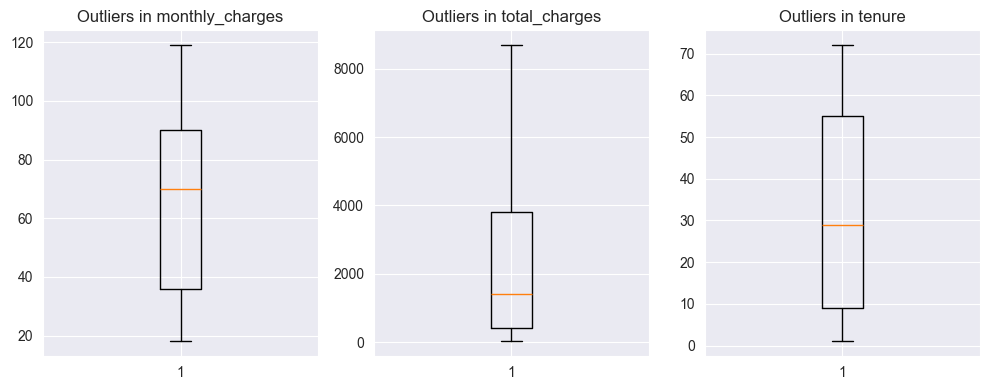

In [201]:
# Identifying potential outliers in our data for numeric columns

plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.boxplot(telco['monthly_charges'])
plt.title('Outliers in monthly_charges')

plt.subplot(1, 3, 2)
plt.boxplot(telco['total_charges'])
plt.title('Outliers in total_charges')

plt.subplot(1,3,3)
plt.boxplot(telco['tenure'])
plt.title('Outliers in tenure')

plt.tight_layout()

plt.show()

In [202]:
telco['monthly_charges'].describe()

count    7032.000000
mean       64.795222
std        30.087634
min        18.000000
25%        36.000000
50%        70.000000
75%        90.000000
max       119.000000
Name: monthly_charges, dtype: float64

In [203]:
# While this is unnescary, I want to showcase versitility so ill add in a outliers for us to remove

new_row = {'monthly_charges': [300, 400, 500]}

new_row = pd.DataFrame(new_row)

telco = pd.concat([telco, new_row], ignore_index=True)

telco.shape

(7035, 23)

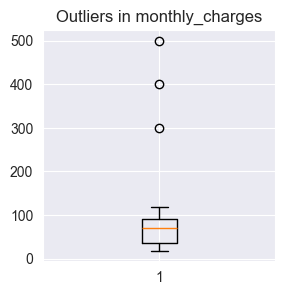

In [204]:
# Showing newly creeated outliers

plt.figure(figsize=(3,3))
plt.boxplot(telco['monthly_charges'])
plt.title('Outliers in monthly_charges')
plt.show()

<div style='background-color: #FFD60A; padding: 20px; color: #000000'>
Clearly we do not want outliers to skew our data so we will remove them. We have two options rmoving outliers with IQR or Z-Scores the method we use will be determined based on our datas distribution

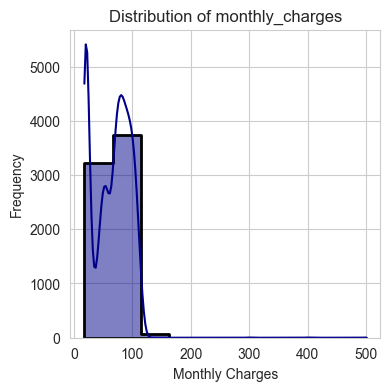

In [205]:
# Creating a histograph to view the distribution on our data

sns.set_style(style='whitegrid')

plt.figure(figsize=(4,4))
sns.histplot(telco['monthly_charges'], kde=True, bins= 10, color= 'darkblue', 
             element='step', linewidth=2, edgecolor='black')
plt.title('Distribution of monthly_charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

In [206]:
# Unfortunately our histograph is not very telling, this is probably due to there being so many different monthly_charges

unique_monthly_charges = telco['monthly_charges'].nunique()
print(f'The number of unique monthly_charges: {unique_monthly_charges}')

The number of unique monthly_charges: 104


In [207]:
# To fix this issue ill create seperate bins or categories for each range of monthly_charges

bin_edges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]

bin_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59',
              '60-69', '70-79', '80-89', '90-99', '100+']

telco['monthly_charges_bins'] = pd.cut(telco['monthly_charges'], bins=bin_edges, labels=bin_labels, include_lowest=True, right=False)

bin_counts = telco['monthly_charges_bins'].value_counts().sort_index()
print(bin_counts)

total_bin_count = bin_counts.sum()
print(f'\nThe number of rows represented: {total_bin_count}')

monthly_charges_bins
0-9         0
10-19     208
20-29    1412
30-39     197
40-49     416
50-59     612
60-69     506
70-79     924
80-89     932
90-99     860
100+      711
Name: count, dtype: int64

The number of rows represented: 6778


In [208]:
row_check = telco['monthly_charges_bins'].count()
print(f'The number of rows in monthly_charges: {row_check}')

The number of rows in monthly_charges: 6778


In [209]:
# For some reason we lost several hundred rows when creating bins, lets discover why

np.sort(telco['monthly_charges'].unique())

array([ 18,  19,  20,  21,  23,  24,  25,  26,  27,  28,  29,  30,  31,
        32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,
        45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,
        58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
        71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
        84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 300, 400, 500],
      dtype=int64)

<div style='background-color: #FFD60A; color: #000000; padding: 20px;'>
It appears that our bin categories did not represent all of our data and must be adjusted.
<br>
<br>
Normally I would remove simply fix this without any explanation but I want this analysis to document everything, including mistakes made and the critical thinking involved when trouble shooting problems.

In [210]:
# Adjusting the bins

bin_edges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 501]

bin_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59',
              '60-69', '70-79', '80-89', '90-99', '100-501']

telco['monthly_charges_bins'] = pd.cut(telco['monthly_charges'], bins=bin_edges, labels=bin_labels, include_lowest=True, right=False)

bin_counts = telco['monthly_charges_bins'].value_counts().sort_index()
print(bin_counts)

total_bin_count = bin_counts.sum()
print(f'\nThe number of rows represented: {total_bin_count}')

monthly_charges_bins
0-9           0
10-19       208
20-29      1412
30-39       197
40-49       416
50-59       612
60-69       506
70-79       924
80-89       932
90-99       860
100-501     968
Name: count, dtype: int64

The number of rows represented: 7035


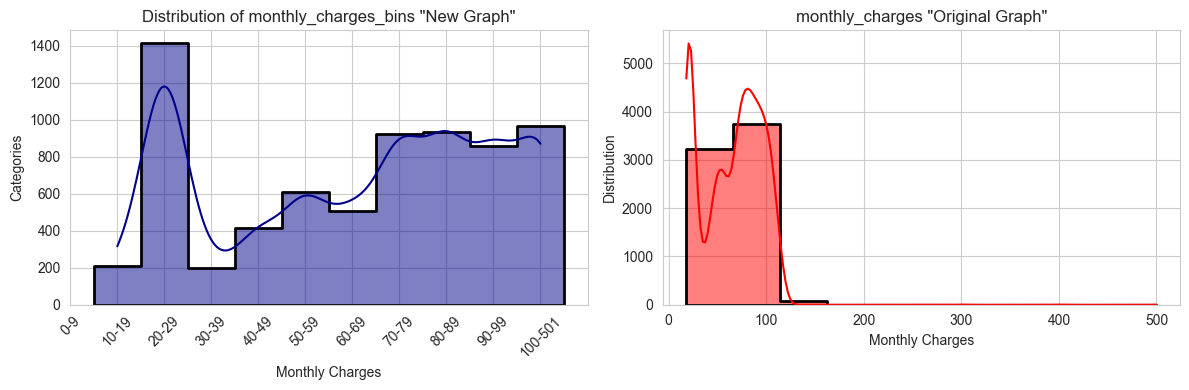

In [211]:
# Plotting both graphs side by side to highlight how the same data can show very different trends when properly transformed

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(telco['monthly_charges_bins'], kde=True, bins= 10, color= 'darkblue', 
             element='step', linewidth=2, edgecolor='black')
plt.title('Distribution of monthly_charges_bins "New Graph"')
plt.xlabel('Monthly Charges')
plt.xticks(rotation=45)
plt.ylabel('Categories')

plt.subplot(1,2,2)
sns.histplot(telco['monthly_charges'], kde=True, bins=10, color='red',
             element='step', edgecolor='black', linewidth=2)
plt.title('monthly_charges "Original Graph"')
plt.xlabel('Monthly Charges')
plt.ylabel('Distribution')

plt.tight_layout()
plt.show()

<div style='background-color: #FFD60A ; color:#000000; padding:20px'>
Now that we can see the distribution of our data we can decide on a method for removing outliers.
<br>
<br>
    
**We have two options here:**
- Removal of outliers based on Z-score
- Removal of outliers based on Inter Quartile Range (IQR)
<br>

I wont go to deep but for contenxt z-scores are typically used when your data is normally distributed aka a bell curve. Since our data skews to the right IQR is the logical approach.

In [212]:
# Calculating IQR for monthly_charges

q1 = np.percentile(telco['monthly_charges'], 25)
q3 = np.percentile(telco['monthly_charges'], 75)

iqr= q3 - q1

print(f'Quartile number 1: {q1}')
print(f'Quartile number 3: {q3}')
print(f'\nInter Qurartile Range: {iqr}')

Quartile number 1: 36.0
Quartile number 3: 90.0

Inter Qurartile Range: 54.0


In [213]:
# IQR can be confirmed with .describe by subtracting 75% (q3) from 25% (q1)

telco['monthly_charges'].describe()

count    7035.000000
mean       64.938166
std        30.913185
min        18.000000
25%        36.000000
50%        70.000000
75%        90.000000
max       500.000000
Name: monthly_charges, dtype: float64

In [214]:
# IQR can also be found using the iqr package from scipy

from scipy.stats import iqr

data = telco['monthly_charges']

iqr = iqr(data)

print(f'Inter Quartile Range: {iqr}')

Inter Quartile Range: 54.0


In [215]:
# Defining lower and upper limits of data and removing outliers 

upper_limit = q3 + (1.5 * iqr)
print(f'The upper limit: {upper_limit}')

lower_limit = q1 - (1.5 * iqr)
print(f'The lower limit: {lower_limit}')

outliers = (telco['monthly_charges'] >= upper_limit) | (telco['monthly_charges'] <= lower_limit)

print("Outliers in the 'monthly_charges' column:")
print(telco.loc[outliers, 'monthly_charges'])

The upper limit: 171.0
The lower limit: -45.0
Outliers in the 'monthly_charges' column:
7032    300
7033    400
7034    500
Name: monthly_charges, dtype: int64


In [216]:
# checking umber of rows before dropping outliers

telco.shape

(7035, 24)

In [217]:
# As we can see we have effectively isolated the outliers that were introducted earlier, now we can drop them

telco = telco.drop(telco[outliers].index)

telco.shape

(7032, 24)

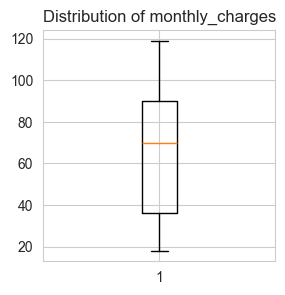

In [218]:
plt.figure(figsize=(3,3))

plt.boxplot(telco['monthly_charges'])
plt.title('Distribution of monthly_charges')
plt.show()

<div style='background-color:#001D3D ; color:#ffffff ; padding:20px ; border-radius:10px;'>

<h2>Bivariate Analysis</h2>

<div style='background-color: #FFD60A ; color:#000000; padding:20px'>
Correlation between quantative variables

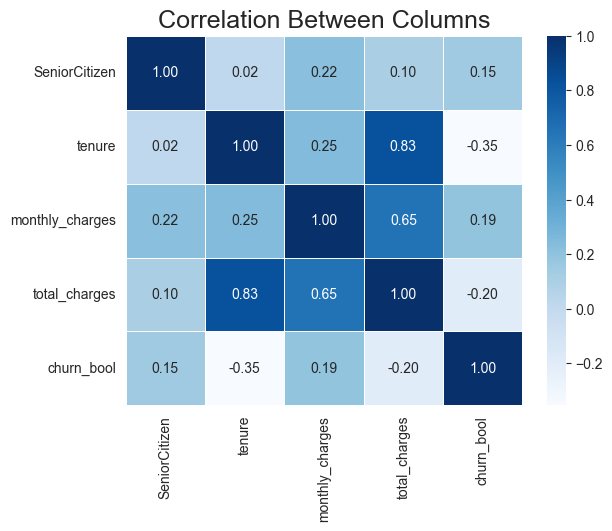

In [219]:
sns.heatmap(telco.corr(numeric_only=True), annot=True, fmt='.2f', linewidth='.5', cmap='Blues')

plt.title('Correlation Between Columns', fontsize=18)
plt.show()

In [220]:
# Identifying customer churn rate

churned_customer = telco[telco['Churn'] == 'Yes']

count_churned = churned_customer.shape[0]
print(f'Total customers from dataset churned: {count_churned}')

total_customers = len(telco)
print(f'Total number of customers from the dataset: {total_customers}')

churn_rate = (count_churned / total_customers) * 100

print(f'Customer churn rate: {churn_rate: .2f}%')

Total customers from dataset churned: 1869
Total number of customers from the dataset: 7032
Customer churn rate:  26.58%


In [221]:
churned_customers = telco[telco['Churn'] == 'Yes']
total_customers = len(telco)

churn_rate = (len(churned_customers) / total_customers) * 100
print(f'Churn Rate: {churn_rate:.2f}%')

Churn Rate: 26.58%


In [222]:
telco.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,monthly_charges,total_charges,senior_citizen,churn_bool,monthly_charges_bins
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,30,30.0,No,0.0,30-39
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,57,1890.0,No,0.0,50-59
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,54,108.0,No,1.0,50-59
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No,42,1841.0,No,0.0,40-49
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes,71,152.0,No,1.0,70-79


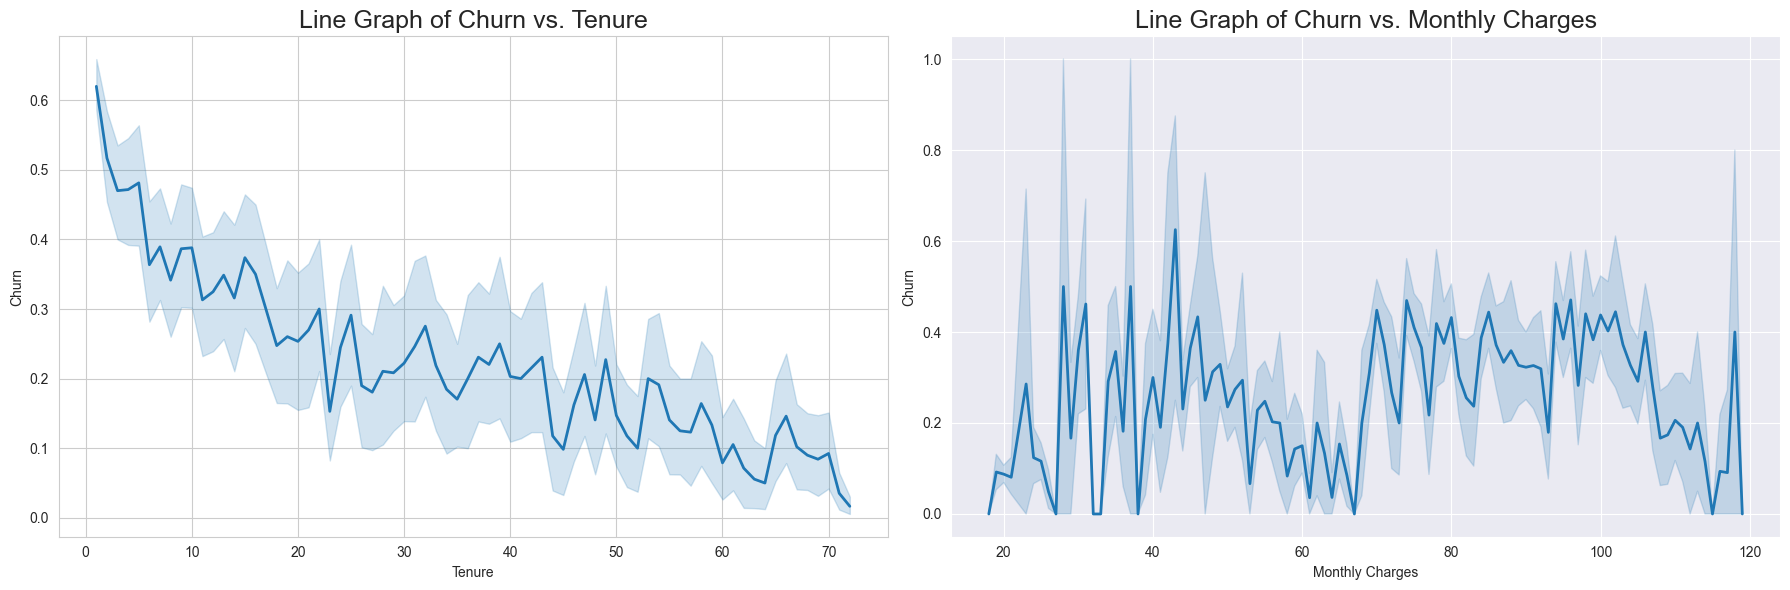

In [223]:
# plotting linegraphs that show the relationship between tenure and churn_bool and monthly_charges and churn_bool

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.set_style('darkgrid')
sns.lineplot(
    y=telco['churn_bool'], x=telco['tenure'],
    linewidth=2, markers=True)

plt.xlabel('Tenure')
plt.ylabel('Churn')
plt.title('Line Graph of Churn vs. Tenure', fontsize=18)

plt.subplot(1, 2, 2)
sns.lineplot(
    y=telco['churn_bool'], x=telco['monthly_charges'],
    linewidth=2, markers=True)

plt.xlabel('Monthly Charges')
plt.ylabel('Churn')
plt.title('Line Graph of Churn vs. Monthly Charges', fontsize=18)

plt.tight_layout()
plt.show()

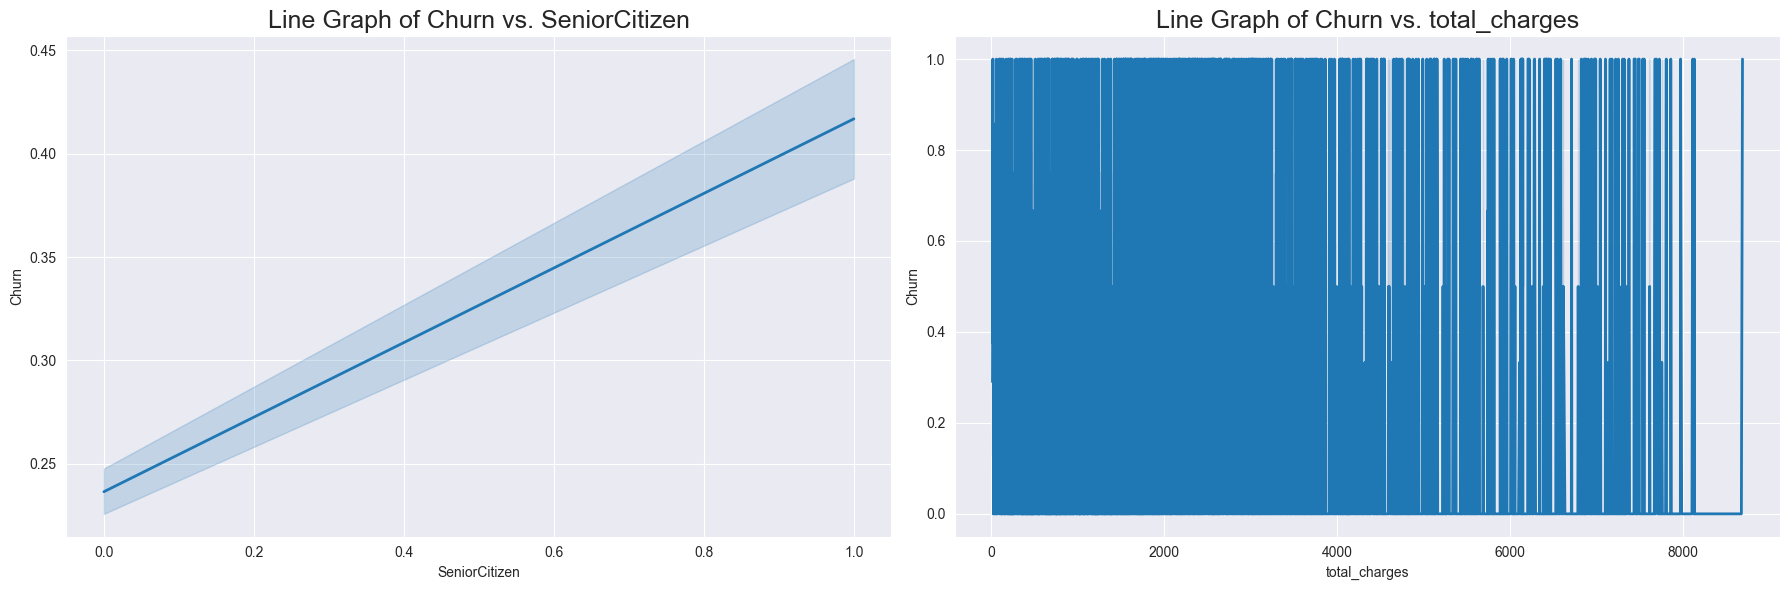

In [224]:
# plotting linegraphs that show the relationship between SeniorCitizen and churn_bool and total_charges and churn_bool
# Ultimately these graphs dont end up telling us much of anything

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.set_style('darkgrid')
sns.lineplot(
    y=telco['churn_bool'], x=telco['SeniorCitizen'],
    linewidth=2, markers=True)

plt.xlabel('SeniorCitizen')
plt.ylabel('Churn')
plt.title('Line Graph of Churn vs. SeniorCitizen', fontsize=18)

plt.subplot(1, 2, 2)
sns.lineplot(
    y=telco['churn_bool'], x=telco['total_charges'],
    linewidth=2, markers=True)

plt.xlabel('total_charges')
plt.ylabel('Churn')
plt.title('Line Graph of Churn vs. total_charges', fontsize=18)

plt.tight_layout()
plt.show()

<div style='background-color: #FFD60A ; color:#000000; padding:20px'>
Now that we have identified the correlations between the quantative variables, we will identify association between non-numeric or categorical variables.
<br>
<br>
    
**This can be done for all of the variables but for simplicity ill choose 3:**
- association between 'Churn' and 'senior_citizen'
- association between 'Churn' and 'PaymentMethod'
- association between 'Churn' and 'Contract'

**Our process for identifying associations will go as follows:**
- hypothesis formation and testing
- discoverying churn rates for values in each category
- visualization of findings

**Hypothesis formation and testing for senior_citizens**

<p>Null hypothesis or H<sub>0</sub>:There is no association between senior citizen status and customer churn, they are indepent from one another.</p>

<p>Alternative hypothesis or H<sub>1</sub>: There is an association between senior citizen status and customer churn, they are dependant on one another.</p>

Confidence interval or CI: 95%

Level of significants or α: .05

In [225]:
from scipy.stats import chi2_contingency

In [226]:
# Creating a congitency table and performing chi-squared test

senior_citizen_churn = pd.crosstab(telco['senior_citizen'], telco['Churn'])

chi2, p, dof, expected = chi2_contingency(senior_citizen_churn)

print(f'Chi-squared test statistic: {chi2:.4f}')
print(f'P-value: {p:.4f}')
print(f'Degrees of freedom: {dof}')
print('Expected frequencies:')
print(expected)

Chi-squared test statistic: 158.4408
P-value: 0.0000
Degrees of freedom: 1
Expected frequencies:
[[4324.52645051 1565.47354949]
 [ 838.47354949  303.52645051]]


Based on our P-value of .0000 we reject our null hypothesis in favor of our alternative hypothesis that: There is an association between senior citizen status and customer churn, they are dependant on one another.

In [227]:
telco['senior_citizen'].unique()

array(['No', 'Yes'], dtype=object)

In [228]:
# Identifying the churn rate for senior_citizens v non senior_citizens

senior_citizen_churn = pd.crosstab(telco['senior_citizen'], telco['Churn'])

senior_citizen_churn['churn_rate'] = senior_citizen_churn['Yes'] / (senior_citizen_churn['No'] + senior_citizen_churn['Yes'])

senior_citizen_churn_percent = senior_citizen_churn['churn_rate'] * 100

print('Percentage of churn for senior_citizens vs. NON senior_citizens:')

print(f'\nPercent churn for senior_citizens: {senior_citizen_churn_percent.iloc[1]:.2f}%')

print(f'Percent churn for NON senior_citizens: {senior_citizen_churn_percent.iloc[0]:.2f}%')

Percentage of churn for senior_citizens vs. NON senior_citizens:

Percent churn for senior_citizens: 41.68%
Percent churn for NON senior_citizens: 23.65%


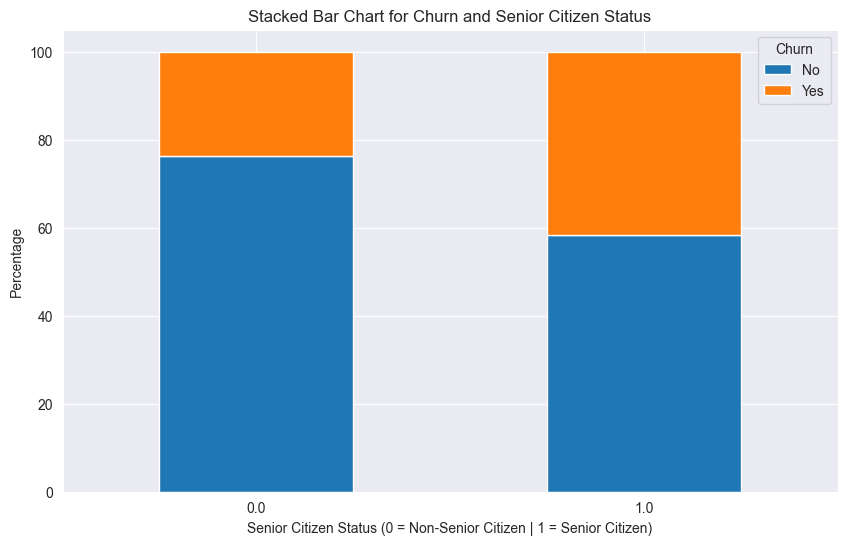

In [229]:
data = telco.groupby(['SeniorCitizen', 'Churn']).size().unstack()
data_percentage = data.div(data.sum(axis=1), axis=0) * 100 

data_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Senior Citizen Status (0 = Non-Senior Citizen | 1 = Senior Citizen)')
plt.xticks(rotation=0)
plt.ylabel('Percentage')
plt.title('Stacked Bar Chart for Churn and Senior Citizen Status')

plt.legend(title='Churn', loc='upper right')
plt.show()


<hr>

**Hypothesis formation and testing for PaymentMethod**

<p>Null hypothesis or H<sub>0</sub>:There is no association between the PaymentMethod and customer churn, they are indepent from one another.</p>

<p>Alternative hypothesis or H<sub>1</sub>: There is an association between PaymentMethod and customer churn, they are dependant on one another.</p>

Confidence interval or CI: 95%

Level of significants or α: .05

In [230]:
# Creating a congitency table and performing chi-squared test

PaymentMethod_churn = pd.crosstab(telco['PaymentMethod'], telco['Churn'])

chi2, p, dof, expected = chi2_contingency(PaymentMethod_churn)

print(f'Chi-squared test statistic: {chi2:.4f}')
print(f'P-value: {p:.4f}')
print(f'Degrees of freedom: {dof}')
print('Expected frequencies:')
print(expected)

Chi-squared test statistic: 645.4299
P-value: 0.0000
Degrees of freedom: 3
Expected frequencies:
[[1132.15955631  409.84044369]
 [1116.74104096  404.25895904]
 [1736.41851536  628.58148464]
 [1177.68088737  426.31911263]]


Based on our P-value of .0000 we reject our null hypothesis in favor of our alternative hypothesis that: There is an association between PaymentMethod and customer churn, they are dependant on one another.

In [231]:
# Unique values in PaymentMethod

telco['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [232]:
# Identifying the churn rate for each value inside of the PaymentMethod column

methods = {'Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'}

PaymentMethod_churn = pd.crosstab(telco['PaymentMethod'], telco['Churn'])
PaymentMethod_churn['churn_rate'] = PaymentMethod_churn['Yes'] / (PaymentMethod_churn['No'] + PaymentMethod_churn['Yes'])
PaymentMethod_churn_percent = PaymentMethod_churn['churn_rate'] * 100

print('Percentage of churn for each PaymentMethod:')
print()
for method in methods:
    churn_rate = PaymentMethod_churn_percent.loc[method]
    print(f'Percent churn for {method}: {churn_rate:.2f}%')

Percentage of churn for each PaymentMethod:

Percent churn for Mailed check: 19.20%
Percent churn for Bank transfer (automatic): 16.73%
Percent churn for Electronic check: 45.29%
Percent churn for Credit card (automatic): 15.25%


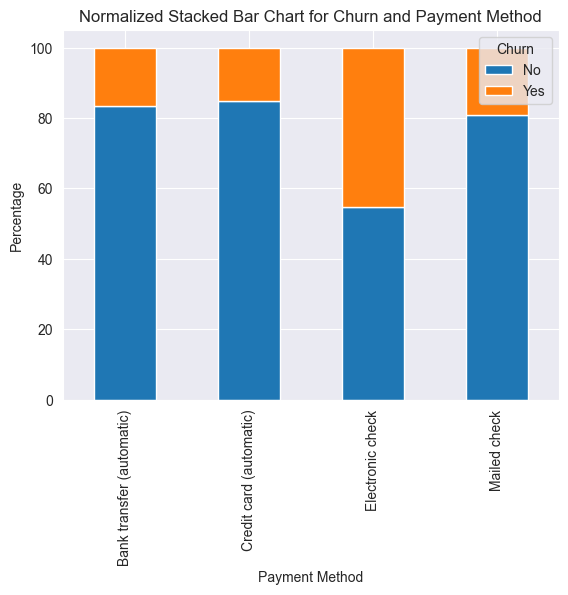

In [233]:
data_payment = telco.groupby(['PaymentMethod', 'Churn']).size().unstack()
data_payment_percentage = data_payment.div(data_payment.sum(axis=1), axis=0) * 100

data_payment_percentage.plot(kind='bar', stacked=True)

plt.xlabel('Payment Method')
plt.ylabel('Percentage')
plt.title('Normalized Stacked Bar Chart for Churn and Payment Method')

plt.legend(title='Churn')

plt.show()

<hr>

**Hypothesis formation and testing for Contract**

<p>Null hypothesis or H<sub>0</sub>:There is no association between the Contract and customer churn, they are indepent from one another.</p>

<p>Alternative hypothesis or H<sub>1</sub>: There is an association between Contract and customer churn, they are dependant on one another.</p>

Confidence interval or CI: 95%

Level of significants or α: .05

In [234]:
# Creating a congitency table and performing chi-squared test

Contract_churn = pd.crosstab(telco['Contract'], telco['Churn'])

chi2, p, dof, expected = chi2_contingency(Contract_churn)

print(f'Chi-squared test statistic: {chi2:.4f}')
print(f'P-value: {p:.4f}')
print(f'Degrees of freedom: {dof}')
print('Expected frequencies:')
print(expected)

Chi-squared test statistic: 1179.5458
P-value: 0.0000
Degrees of freedom: 2
Expected frequencies:
[[2845.08319113 1029.91680887]
 [1080.76450512  391.23549488]
 [1237.15230375  447.84769625]]


Based on our P-value of .0000 we reject our null hypothesis in favor of our alternative hypothesis that: There is an association between Contract and customer churn, they are dependant on one another.

In [235]:
# Unique values in Contract

telco['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [236]:
# Identifying the churn rate for each value inside of the Contract column

methods = {'Month-to-month', 'One year', 'Two year'}

Contract_churn = pd.crosstab(telco['Contract'], telco['Churn'])
Contract_churn['churn_rate'] = Contract_churn['Yes'] / (Contract_churn['No'] + Contract_churn['Yes'])
Contract_churn_percent = Contract_churn['churn_rate'] * 100

print('Percentage of churn for each Contract type:')
print()
for method in methods:
    churn_rate = Contract_churn_percent.loc[method]
    print(f'Percent churn for {method}: {churn_rate:.2f}%')

Percentage of churn for each Contract type:

Percent churn for Month-to-month: 42.71%
Percent churn for Two year: 2.85%
Percent churn for One year: 11.28%


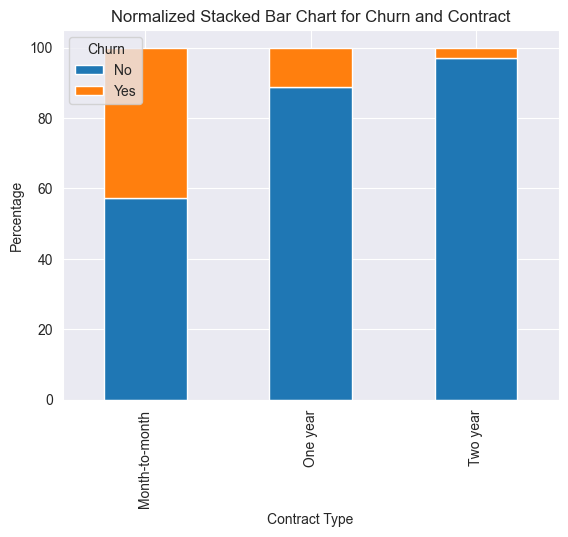

In [237]:
data_contract = telco.groupby(['Contract', 'Churn']).size().unstack()
data_contract_percentage = data_contract.div(data_contract.sum(axis=1), axis=0) * 100

data_contract_percentage.plot(kind='bar', stacked=True)

plt.xlabel('Contract Type')
plt.ylabel('Percentage')
plt.title('Normalized Stacked Bar Chart for Churn and Contract')

plt.legend(title='Churn')

plt.show()

<div style='background-color: #001D3D; color:#ffffff; border-radius:10px; padding:20px;'>
<h2>Churn Prevention Model Building</h2>

In [238]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [239]:
# Creating a copy of our telco dataframe with the columns that we have identified so far that have some sort of association with churn

ml = telco[['Churn','monthly_charges_bins', 'tenure', 'senior_citizen', 'Contract', 'PaymentMethod']]

ml.head()

,Churn,monthly_charges_bins,tenure,senior_citizen,Contract,PaymentMethod
0,No,30-39,1.0,No,Month-to-month,Electronic check
1,No,50-59,34.0,No,One year,Mailed check
2,Yes,50-59,2.0,No,Month-to-month,Mailed check
3,No,40-49,45.0,No,One year,Bank transfer (automatic)
4,Yes,70-79,2.0,No,Month-to-month,Electronic check


In [240]:
# Encoding the desired columns with one hot encoding

ml_dummies = pd.get_dummies(ml, columns=['Churn','monthly_charges_bins', 'tenure', 'senior_citizen', 'Contract', 'PaymentMethod'], drop_first=True)

ml_dummies.head()

,Churn_Yes,monthly_charges_bins_10-19,monthly_charges_bins_20-29,monthly_charges_bins_30-39,monthly_charges_bins_40-49,monthly_charges_bins_50-59,monthly_charges_bins_60-69,monthly_charges_bins_70-79,monthly_charges_bins_80-89,monthly_charges_bins_90-99,monthly_charges_bins_100-501,tenure_2.0,tenure_3.0,tenure_4.0,tenure_5.0,tenure_6.0,tenure_7.0,tenure_8.0,tenure_9.0,tenure_10.0,tenure_11.0,tenure_12.0,tenure_13.0,tenure_14.0,tenure_15.0,tenure_16.0,tenure_17.0,tenure_18.0,tenure_19.0,tenure_20.0,tenure_21.0,tenure_22.0,tenure_23.0,tenure_24.0,tenure_25.0,tenure_26.0,tenure_27.0,tenure_28.0,tenure_29.0,tenure_30.0,tenure_31.0,tenure_32.0,tenure_33.0,tenure_34.0,tenure_35.0,tenure_36.0,tenure_37.0,tenure_38.0,tenure_39.0,tenure_40.0,tenure_41.0,tenure_42.0,tenure_43.0,tenure_44.0,tenure_45.0,tenure_46.0,tenure_47.0,tenure_48.0,tenure_49.0,tenure_50.0,tenure_51.0,tenure_52.0,tenure_53.0,tenure_54.0,tenure_55.0,tenure_56.0,tenure_57.0,tenure_58.0,tenure_59.0,tenure_60.0,tenure_61.0,tenure_62.0,tenure_63.0,tenure_64.0,tenure_65.0,tenure_66.0,tenure_67.0,tenure_68.0,tenure_69.0,tenure_70.0,tenure_71.0,tenure_72.0,senior_citizen_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
2,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [241]:
# Splitting our ml_dummies variable into training and test data

X = ml_dummies.drop('Churn_Yes', axis=1)
y = ml_dummies['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [242]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [243]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [244]:
y_pred = model.predict(X_test_scaled)

In [245]:
# Evaluating the model for accuracy and other performance metrics

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)

Accuracy: 0.7385

Confusion Matrix:
[[833 200]
 [168 206]]

Classification Report:
              precision    recall  f1-score   support

       False       0.83      0.81      0.82      1033
        True       0.51      0.55      0.53       374

    accuracy                           0.74      1407
   macro avg       0.67      0.68      0.67      1407
weighted avg       0.75      0.74      0.74      1407



<div style='background-color: #FFD60A ; color:#000000; padding:20px'>

All in all our machine learning model to predict churn is about 74% accurate, ideally we should want this to be much higher and could improve its performance with further feature engineering, hyperparameter tuning and by addressing class imbalance.
<br>

However I do not have plans to actually use or deploy this model so we will call it a day and accept it how it is.

<div style='background-color: #001D3D; color:#ffffff; border-radius:10px; padding:20px;'>
<h2>SQL Integration and Queries</h2>

<div style='background-color: #FFD60A ; color:#000000; padding:20px'>
This section is dedicated to querying our data using SQL from SSMS, while this could all be done inside of SSMS I will create a direction connection instead so every query can be documented in one place.

In [246]:
# Exporting the telco datafram that we have modified during this analysis so far

telco.to_csv(r'C:\Users\peige\OneDrive\Desktop\Data Analytics Projects\Telco Churn Rate Analysis.csv', index=False)

In [247]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import itertools
import warnings
from sqlalchemy import create_engine as ce
import pypyodbc as podbc

In [248]:
# Establishing a connection to SSMS with SQLalchemy

url = "mssql+pyodbc:///?odbc_connect=" \
      "Driver={SQL Server Native Client 11.0};" \
      "Server=MALYS\\PM2022SMSS;" \
      "Database=Telco;" \
      "Trusted_Connection=yes;"

engine = ce(url)

query = pd.read_sql_query(
    '''SELECT * 
    FROM dbo.Telco
    ''', engine)

query.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,monthly_charges,total_charges,senior_citizen,churn_bool,monthly_charges_bins
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,30,30.0,No,0,30-39


In [251]:
# Checking data types in SSMS

query = pd.read_sql_query(
    '''SELECT COLUMN_NAME, DATA_TYPE
        FROM INFORMATION_SCHEMA.COLUMNS
        WHERE TABLE_NAME = 'Telco';
    ''', engine)

query

,COLUMN_NAME,DATA_TYPE
0,customerID,varchar
1,gender,varchar
2,SeniorCitizen,varchar
3,Partner,varchar
4,Dependents,varchar
5,tenure,varchar
6,PhoneService,varchar
7,MultipleLines,varchar
8,InternetService,varchar
9,OnlineSecurity,varchar


In [259]:
# Determining Churn Rate through SQL & SSMS

query = pd.read_sql_query(
    '''SELECT 
    SUM(churn_bool) as churned,
    COUNT(*) as total_customers,
    FORMAT((SUM(churn_bool) * 100.0 / COUNT(*)), '0.00') as churn_rate
    FROM dbo.Telco
    ''', engine)

query.head(1)

,churned,total_customers,churn_rate
0,1869,7032,26.58


In [265]:
# Churn rate based on gender

query= pd.read_sql_query('''
SELECT
    Gender,
    COUNT(*) as TotalCustomers,
    SUM(churn_bool) AS ChurnedCustomers,
    FORMAT((SUM(churn_bool) * 100.0 / COUNT(*)), '0.00') AS ChurnRate
FROM dbo.Telco
GROUP BY Gender;

''', engine)

query

,Gender,TotalCustomers,ChurnedCustomers,ChurnRate
0,Male,3549,930,26.20
1,Female,3483,939,26.96


In [267]:
# Churn rate of InternetService

query = pd.read_sql_query('''
SELECT 
    InternetService,
    COUNT(*) as total_customers,
    SUM(churn_bool) as churned,
    FORMAT((SUM(churn_bool) * 100/ COUNT(*)), '0.00') as churn_rate
FROM dbo.Telco
GROUP BY InternetService;
''', engine)

query

,InternetService,total_customers,churned,churn_rate
0,No,1520,113,7.00
1,DSL,2416,459,18.00
2,Fiber optic,3096,1297,41.00


In [268]:
# Churn rate of TechSupport

query = pd.read_sql_query('''
SELECT 
    TechSupport,
    COUNT(*) as total_customers,
    SUM(churn_bool) as churned,
    FORMAT((SUM(churn_bool)*100 / COUNT(*)), '0.00') as churn_rate
FROM dbo.Telco
GROUP BY TechSupport;
''', engine)

query

,TechSupport,total_customers,churned,churn_rate
0,Yes,2040,310,15.00
1,No internet service,1520,113,7.00
2,No,3472,1446,41.00


In [270]:
# Churn rate of StreamingTV and StreamingMovies

query = pd.read_sql_query('''
SELECT 
    'StreamingTV' AS Category,
    StreamingTV AS Feature,
    COUNT(*) as total_customers,
    SUM(churn_bool) as churned,
    FORMAT((SUM(churn_bool) * 100 / COUNT(*)), '0.00') as churn_rate
FROM dbo.Telco
GROUP BY StreamingTV

UNION

SELECT 
    'StreamingMovies' AS Category,
    StreamingMovies AS Feature,
    COUNT(*) as total_customers,
    SUM(churn_bool) as churned,
    FORMAT((SUM(churn_bool) * 100 / COUNT(*)), '0.00') as churn_rate
FROM dbo.Telco
GROUP BY StreamingMovies;
''',engine)

query

,Category,Feature,total_customers,churned,churn_rate
0,StreamingTV,Yes,2703,814,30.00
1,StreamingTV,No internet service,1520,113,7.00
2,StreamingTV,No,2809,942,33.00
3,StreamingMovies,Yes,2731,818,29.00
4,StreamingMovies,No internet service,1520,113,7.00
5,StreamingMovies,No,2781,938,33.00


In [271]:
# Churn rate for MultipleLines

query = pd.read_sql_query('''
SELECT 
    MultipleLines,
    COUNT(*) as total_customers,
    SUM(churn_bool) as churned,
    FORMAT((SUM(churn_bool) *100 / COUNT(*)), '0.00') as churn_rate
FROM dbo.Telco
GROUP BY MultipleLines;
''', engine)

query

,MultipleLines,total_customers,churned,churn_rate
0,Yes,2967,850,28.00
1,No,3385,849,25.00
2,No phone service,680,170,25.00


<div style='background-color: #001D3D; color:#ffffff; border-radius:10px; padding:20px;'>
<h2>Excel & Tableau Dashboards</h2>

The dataset was manipulated further inside of Excel to provide the exact data necessary to compose various graphs.

What it was all said an done this is our final Excel Dashboard. While this dashboard does not utilize slicers, it has is able to let stakeholder input their target churn and identify how much MRR can be recovered for every percent dropped under the average.

For example a 10% drop in churn would result in over $5000,000 in additional yearly earnings for this telecommunications company.

<h4>Excel Dashboard:</h4>

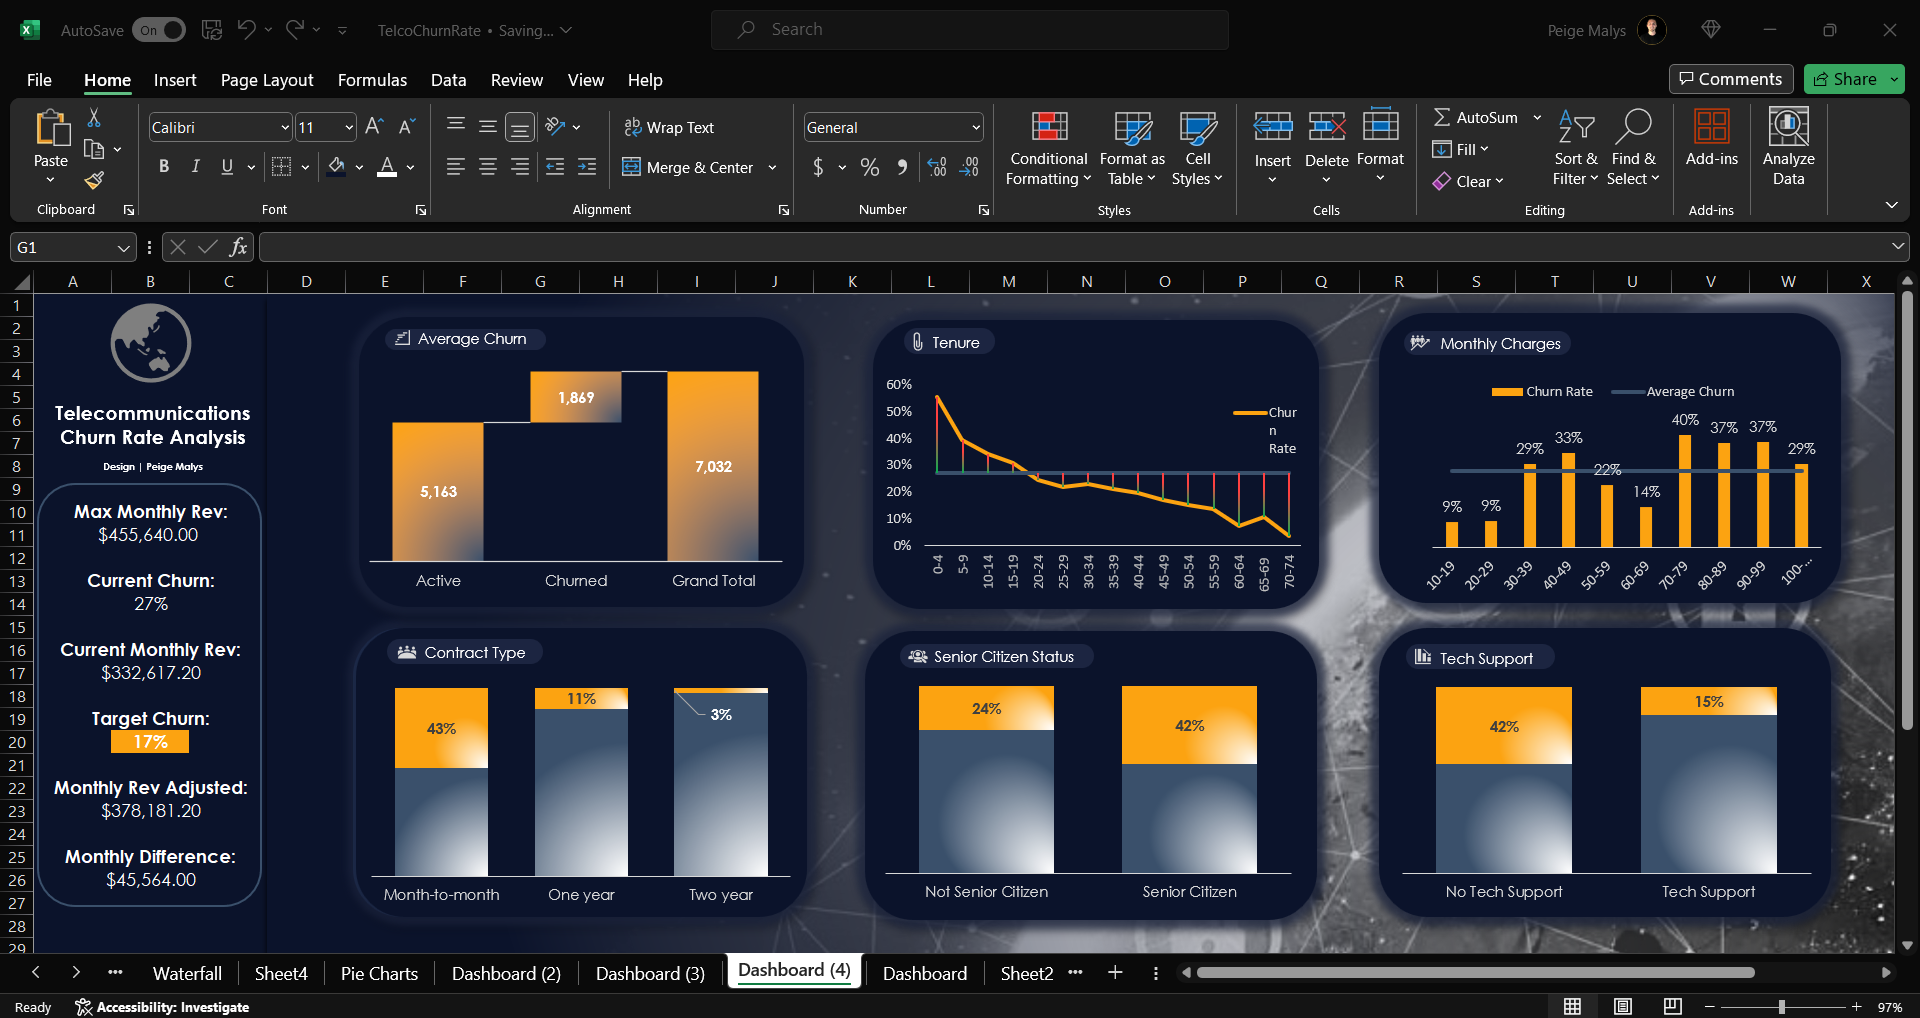
<hr>

Once work was complete in Excel, the newly refined dataset was extracted, loaded and transformed (ELT) In Tableau.

Multiple parameters and calculated fields were created to help visualize the data and efficiently tell its story to stakeholders.

<h4>Tableau Dashboard:</h4>

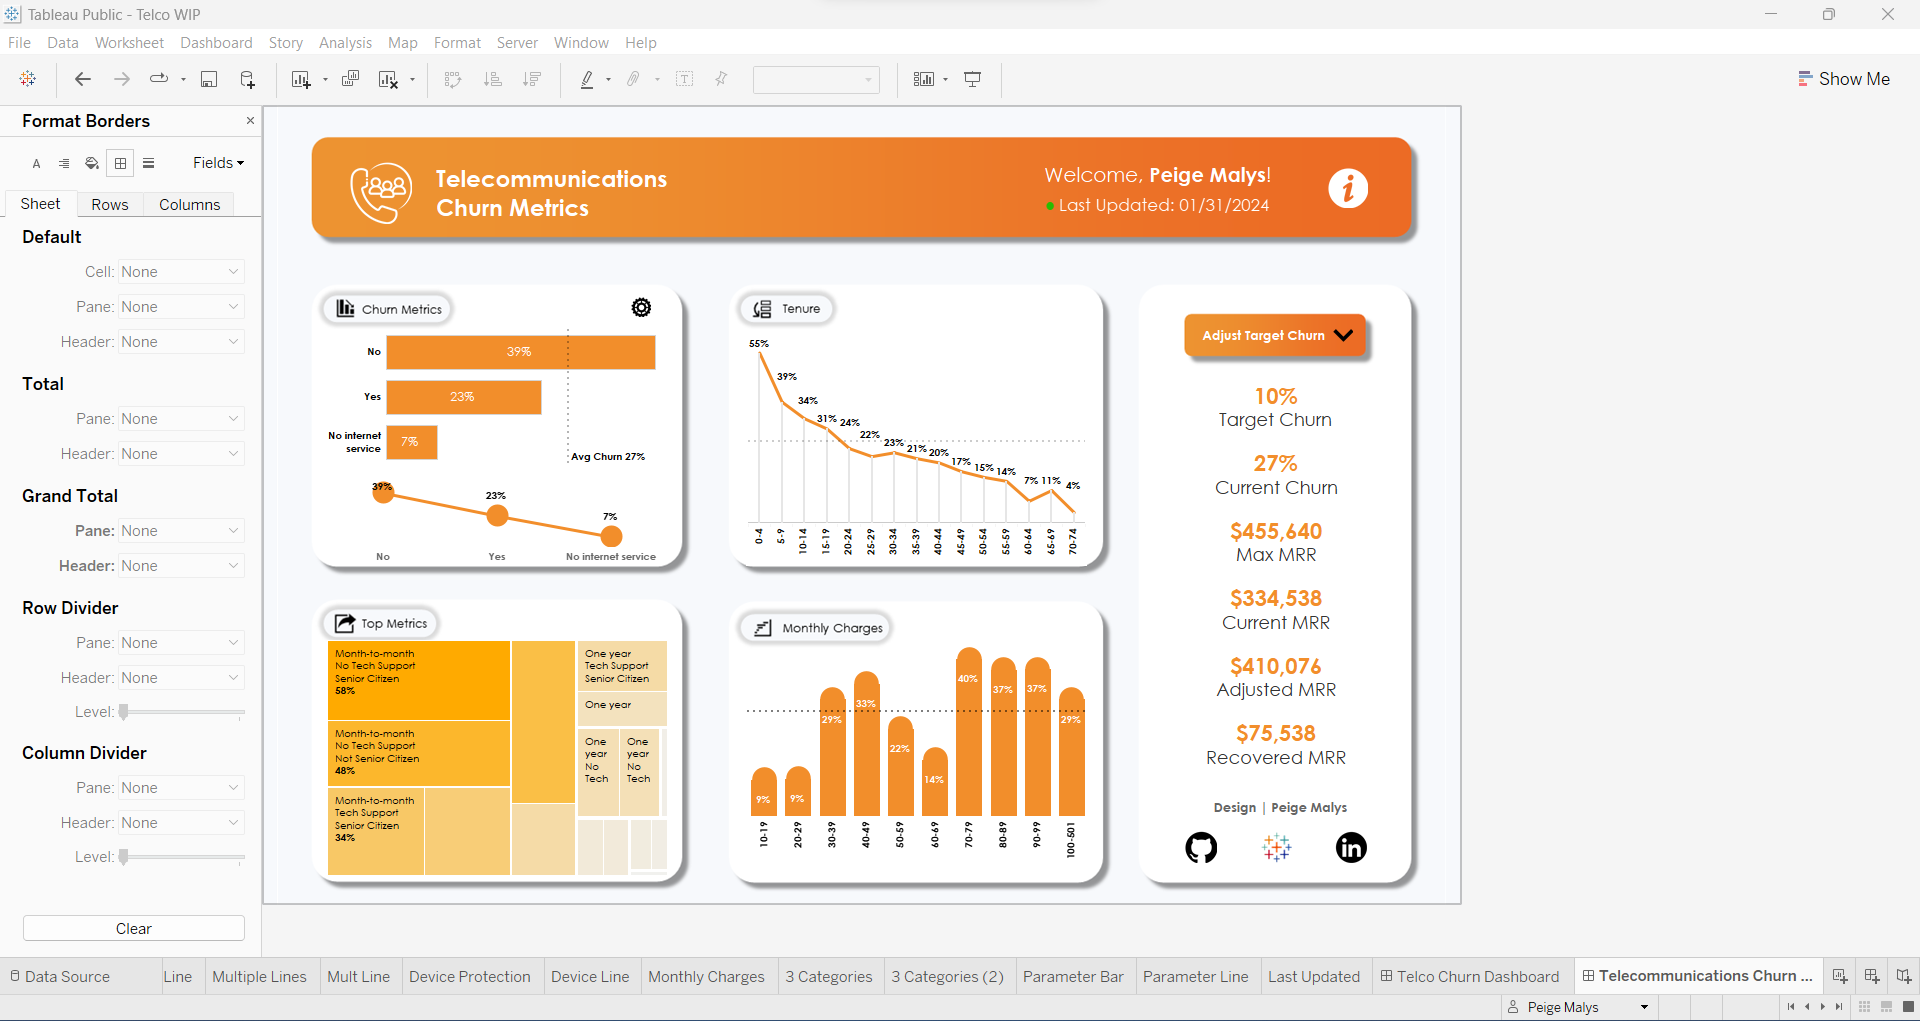

<div style='background-color: #001D3D; color:#ffffff; border-radius:10px; padding:20px;'>
<h2>Analysis conclusions</h2>

<div style='background-color: #FFD60A ; color:#000000; padding:20px'>

**Recap of Business Questions:**
- What is the overall churn rate in the Telco customer base?
- How does the contract type (month-to-month, one year, two years) correlate with churn?
- What is the impact of different payment methods on customer churn?
- Are customers with higher monthly charges more likely to churn?
- Is there a relationship between tenure and churn rate?
- Is there a specific gender that is more likely to churn?
- How does the presence of additional services (StreamingTV, StreamingMovies, TechSupport, etc...) affect churn?
- Are customers with multiple lines more likely to churn?

**What is the overall churn rate in the Telco customer base?**

- Total customers from dataset churned: 1869- 
Total number of customers from the dataset: 703
- 
Customer churn rate:  26.58%

**How does the contract type (month-to-month, one year, two years) correlate with churn?**

The contract type aka the contract legnth has a very strong correlation with churn, the shorter the contract legnth the higher the churn rate.

- Percent churn for Month-to-month: 42.71%
- Percent churn for Two year: 2.85%
- Percent churn for One year: 11.28%

Based on the data Month-to-month contracts have a churn rate of ~15% more than our average churn indicating this is a category where deliberate churn reduction stragies should be focused. Perhaps offer strong incentives to customers on a Month-to-month plan is they are willing to opt into longer term contracts.
<hr>

**What is the impact of different payment methods on customer churn?**

Data shows that payment method does have an impact on churn, in particular customers paying with an Electronic check have a churn rate of ~19% higher than the average churn of 27%.

- Percent churn for Mailed check: 19.20%
- Percent churn for Bank transfer (automatic): 16.73%
- Percent churn for Electronic check: 45.29%
- Percent churn for Credit card (automatic): 15.25%

Ultimately converting customers who pay via Electronic check to any other payment category would be an effective way to reduce overall churn.
<hr>

**Are customers with higher monthly charges more likely to churn?**

Monthly charges does have a statistically significant correlation with churn, however the relationships is not linear. this is illustrated with the following graphs:

<div style="display: flex;">
    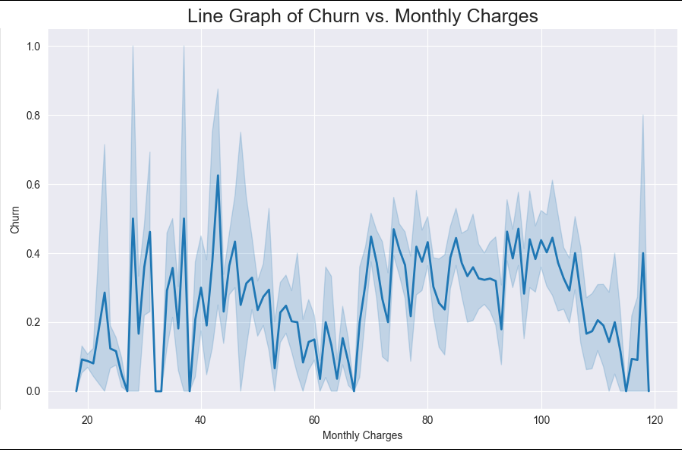
    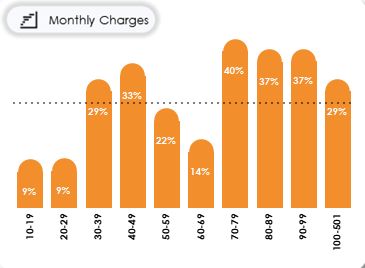
</dv>



In general the higher a customers monthly charges are the more likely they are to churn.
<hr>

**Is there a relationship between tenure and churn rate?**

Yes, as tenure increases churn decreases. Illustrated by the following graph:

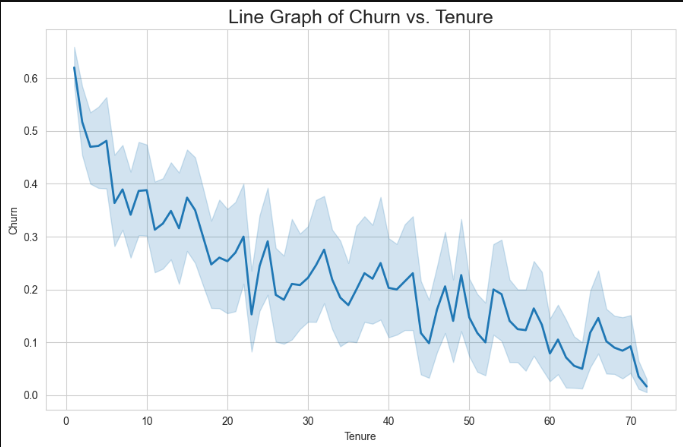
<hr>

**Is there a specific gender that is more likely to churn?**

The churn rate between Males and Females is statistically insignificant with a variation of ~.2%.
<hr>

**How does the presence of additional services (StreamingTV, StreamingMovies, TechSupport, etc...) affect churn?**

Additional services do have some affect on churn, in particular the presence of Tech support has a massive affect.

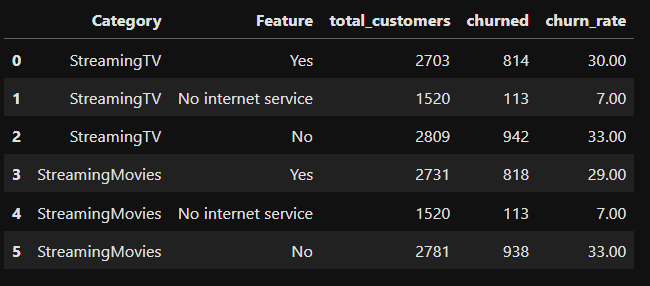 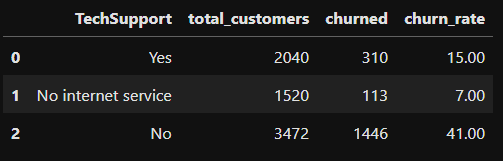<br>
One possible reccomendation for reducing churn would be to provide free tech support to all customers, further analysis would be needed to determine if this is economically viable.
<hr>


**Are customers with multiple lines more likely to churn?**

Customers who have multiple lines are slightly more likely to churn with a churn rate of ~28%. Making this a category that probably is not worth focusing on.